In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 9.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import  numpy as np
import altair
from pathlib import Path
import matplotlib.pyplot as plt

**Homework assingment questions**

- Is the dataset balanced?
- Is the amount of data sufficient for allowing a hold-out dataset?
- Do you have enough data to consider deep neural architectures or might good feature engineering with more shallow models suffice?
- During the data collection process, for some sentences multiple experts disagreed on the sentiment of a given sentence, how could you capture such an ambiguity in your model and potentially notify users about such unclear instances?
- How does your model come to a specific conclusion, what about model interpretability?
- Think beyond the pure sentiment analysis of sentences, e.g. how would you automatically extract relevant sentences from EPARs and ensure that the analysis is only applied to specific sections? It is worth to explore some EPARs on the EMA website (e.g. consider the ones for Bayer products Eylea1 or Xarelto2).

**Machine Learining questions**

Imagine the sentiment analysis should be performed on a regular basis and hence an industrialization and operation of the model would be required.

Could you please brainstorm about a roadmap on how to do that, with focus on the following questions:

- How could an architecture (preferably in the cloud) to industrialize the sentiment analysis model look like?
- What could go wrong in the long run once the model is deployed and used on live data?
- What tools and methodologies would be helpful to deploy and maintain the model in the long run?”

**Dataset analysis**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
epar_data_path = Path('/content/drive/MyDrive/sentences_with_sentiment.xlsx')

In [ ]:
epar_dataset = pd.read_excel(epar_data_path)

In [ ]:
epar_dataset.head()

,ID,Sentence,Positive,Negative,Neutral
0,1,The results in 2nd line treatment show an ORR ...,1,0,0
1,2,The long duration of response and high durable...,1,0,0
2,3,The median OS time in the updated results exce...,0,0,1
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0
4,5,"The data provided in 1st line, although prelim...",1,0,0


In [ ]:
for category in "Positive Negative 	Neutral".split():
  print(category)
  print(sum(epar_dataset[category]))
  print("*"*30)

Positive
160
******************************
Negative
36
******************************
Neutral
70
******************************


In [ ]:
sent_lens = epar_dataset.Sentence.str.len()

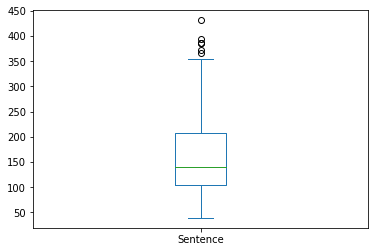

In [ ]:
sent_lens.plot.box()

In [ ]:
print(f"Max char length: {max(sent_lens)}", f"Min char length: {min(sent_lens)}" , f"Mean char length: {(sent_lens.mean()):.0f}")

Max char length: 431 Min char length: 39 Mean char length: 161


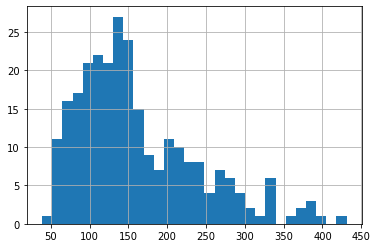

In [ ]:
hist = sent_lens.hist(bins=30)


 
```
**Is the dataset balanced?**

No, the dataset is not balanced well. It is shown that Positive categories occur far more frequent than Negative and Neutral.

Positive: 160
Negative 36
Neutral: 70

Also as it is shown on histogram the lenghts of sentences are quite different with max char length of 431, 
min char length 39 and the average of approx. 161 length.


**Is the amount of data sufficient for allowing a hold-out dataset?**

Well, not really. I don't think such amount of data could be representative for the given problem. 
However as always it depends. 
If we have pretrained model on simalar task with the same kind of data, and we're in a hurry.
The model may (assumption) consist on, within its space, some information to finetune it on this amount of data. After all it is better to have much more data if the hold-out dataset is something we want to have.



**Do you have enough data to consider deep neural 
architectures or might good feature engineering with more shallow models suffice?**

For the normal training, such amount of data is not sufficient. 
For finetuning, maybe ... 
but the model probabily need to first finetuned on some task with this kind of data. 
With such small portion of data 
I would normally consider going machine learning approach with usage of feature engineering. But for some rapid check I will go with DL.


**During the data collection process, 
for some sentences multiple experts disagreed on the 
sentiment of a given sentence, how could you capture 
such an ambiguity in your model and potentially \notify users about such unclear instances?**

We can inform users about the sentiment scores assigned to each class by model.
If the model calculate similar scores 
(we can set some threshold value ie. S(Positive) - S(Negative) < Threshold) 
to each category for the given sentence

**Think beyond the pure sentiment analysis of sentences, e.g. 
how would you automatically extract relevant sentences
from EPARs and ensure that the analysis is only applied 
to specific sections? It is worth to explore some 
EPARs on the EMA website (e.g. consider the ones for Bayer products Eylea1 or Xarelto2).**

If the documents are PDF we can use OCR or othe image analysis approach to extract necessary data. 
The EPAR documents has specific structure, by verifying the ones that where added to the homework folder I can say that table of contents are mostly the same. If know in which sections are the most relevant data we can focus on it by extracting the nessary information.
```



**Checking some word representativness per category**

In [ ]:
sentences_pos = epar_dataset[epar_dataset["Positive"] == 1].Sentence
sentences_neg = epar_dataset[epar_dataset["Negative"] == 1].Sentence
sentences_neutral = epar_dataset[epar_dataset["Neutral"] == 1].Sentence

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_model = CountVectorizer(ngram_range=(1,1), stop_words='english') 
X_pos = count_model.fit_transform(sentences_pos)

In [ ]:
count_values = X_pos.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,47,safety
1,45,data
2,33,study
3,30,efficacy
4,28,clinical
5,27,patients
6,26,treatment
7,26,considered
8,23,profile
9,21,product


In [ ]:
X_neg = count_model.fit_transform(sentences_neg)

In [ ]:
count_values = X_neg.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,17,safety
1,14,data
2,12,patients
3,9,study
4,7,treatment
5,7,limited
6,6,term
7,6,studies
8,6,period
9,6,efficacy


In [ ]:
X_neutral = count_model.fit_transform(sentences_neutral)

In [ ]:
count_values = X_neutral.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,21,studies
1,17,safety
2,15,study
3,12,p10
4,12,ct
5,11,efficacy
6,11,dose
7,11,data
8,10,patients
9,10,insulin


In Positives and Negatives top freq words are similar, some of them are on  the same top positions. Besides there is not much to tell more without more context.

In [ ]:
count_model = CountVectorizer(ngram_range=(2,2), stop_words='english') 
X_pos = count_model.fit_transform(sentences_pos)

In [ ]:
count_values = X_pos.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,20,safety profile
1,15,ct p10
2,11,clinical data
3,9,p10 mabthera
4,8,sof vel
5,8,film coated
6,8,coated tablets
7,7,reference product
8,7,onset sma
9,7,efficacy data


In [ ]:
X_neg = count_model.fit_transform(sentences_neg)

In [ ]:
count_values = X_neg.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,5,long term
1,4,necessary address
2,4,following measures
3,4,considers following
4,4,chmp considers
5,3,updated data
6,3,study period
7,3,safety proflie
8,3,safety data
9,3,reach firm


In [ ]:
X_neutral = count_model.fit_transform(sentences_neutral)

In [ ]:
count_values = X_neutral.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,12,ct p10
1,6,insulin glargine
2,5,long term
3,4,term safety
4,4,safety profile
5,4,safety data
6,4,reference products
7,4,pivotal studies
8,4,et al
9,3,symptomatic infants


In all categories exist bigrams with p10 symbol, more symbols exist in Positives. Exist many bigrams with "word data", Negatives consist of bigrams that measure time. like "long term", "study period".

In [ ]:
count_model = CountVectorizer(ngram_range=(3,3), stop_words={'english'}) 
X_pos = count_model.fit_transform(sentences_pos)

In [ ]:
count_values = X_pos.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,15,safety profile of
1,14,the safety profile
2,10,based on the
3,9,p10 and mabthera
4,9,ct p10 and
5,8,film coated tablets
6,6,the reference product
7,6,sb5 and humira
8,6,of ct p10
9,6,in patients with


In [ ]:
X_neg = count_model.fit_transform(sentences_neg)

In [ ]:
count_values = X_neg.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,5,in order to
1,4,the following measures
2,4,the chmp considers
3,4,of the combination
4,4,necessary to address
5,4,considers the following
6,4,chmp considers the
7,3,very limited to
8,3,updated data are
9,3,up period should


In [ ]:
X_neutral = count_model.fit_transform(sentences_neutral)

In [ ]:
count_values = X_neutral.toarray().sum(axis=0)
x = sorted([(count_values[i],k) for k,i in count_model.vocabulary_.items()], reverse=True)[:20]
df = pd.DataFrame(x, columns =['Freq', 'Word'])

In [ ]:
df

,Freq,Word
0,4,term safety data
1,4,safety profile of
2,4,long term safety
3,4,in order to
4,3,will provide additional
5,3,were infections infusion
6,3,were generally lower
7,3,to that of
8,3,there was no
9,3,the rmp will


The top 20 3-grams are quite different between categories, but it is hard to interpret it with deeper context. Probabily they are somehow representational but 

**Check some sentences**

In [ ]:
for e in epar_dataset.sample(n=20).Sentence:
  print(e)

No major concerns have been identified in the updated analysis
The European Medicines Agency will review new information on this medicinal product at least every year and this SmPC will be updated as necessary
In addition, data from the lixisenatide file has been presented which shows maintenance of efficacy up to 76 weeks in combination with basal insulin.
An 8 week course of SOF/VEL/VOX was similarly efficacious as 12 weeks of SOF/VEL in a difficult to cure DAA-naïve cirrhotic GT3 cohort.
Biosimilarity of CT-P10 and MabThera is considered demonstrated based on the efficacy data.
More detailed data on injection site reactions, hypersensitivity and anaphylactic reactions were requested in order to allow a thorough assessment of this issue both in subjects with and without ADAs.
Long-term safety data will be obtained from the planned and ongoing studies.
Bioequivalence of the FDC to the separate components has been established.
A summary of the literature with regard to clinical data of

Ok, in the sentences occur a lot of code words, special names, numbers, abbreviations. Probably it is not a good idea to remove them at first or treat as a noise. It could be a good idea to normalize such text that is unroll names like RMS, ANC etc. I won't also do any lowercase. Because I want to start with base transformer model, I want to keep as much context for the start as possible.

**Training**

In [ ]:
from torch.utils.data import DataLoader
from transformers import TrainingArguments,Trainer
from transformers import AutoModelForSequenceClassification,AutoTokenizer
from datasets import load_dataset, Dataset, DatasetDict
import numpy as np
from datasets import load_metric

In [ ]:
model_name = "emilyalsentzer/Bio_ClinicalBERT"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
epar_dataset['sentiment'] = None
epar_dataset.loc[sentences_pos.index, 'sentiment'] = "Positive"
epar_dataset.loc[sentences_neg.index, 'sentiment'] = "Negative"
epar_dataset.loc[sentences_neutral.index, 'sentiment'] = "Neutral"

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(epar_dataset['sentiment'].unique())
epar_dataset['target'] = le.transform(epar_dataset['sentiment'])


In [ ]:
num_folds = 4
from sklearn.model_selection import StratifiedKFold
Fold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=666)
for n, (train_index, val_index) in enumerate(Fold.split(epar_dataset['Sentence'], epar_dataset['target'])):
    epar_dataset.loc[val_index, 'fold'] = int(n)
epar_dataset['fold'] = epar_dataset['fold'].astype(int)
train_df = epar_dataset[["Sentence", "target", "fold"]]

In [ ]:
lr = 2e-5
bs = 16
wd = 0.01
epochs = 4
max_len = 200

In [ ]:
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels, average="weighted")["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [ ]:

def get_trainer(d_train, d_valid):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(epar_dataset['sentiment'].unique()))
    args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
        evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
        num_train_epochs=epochs, weight_decay=wd, report_to='none', logging_steps=10)
    return model ,Trainer(model, args, train_dataset=d_train, eval_dataset=d_valid,
                   tokenizer=tokenizer, compute_metrics=compute_metrics)

In [ ]:
def tokenize(row): 
  return tokenizer(row["input"], max_length=max_len, padding="max_length")

In [ ]:
metrics_history = {}
def train(fold):
  train_folds = train_df[train_df['fold'] != fold].reset_index(drop=True)
  valid_folds = train_df[train_df['fold'] == fold].reset_index(drop=True)
  valid_labels = valid_folds['target'].values

  train_dataset = Dataset.from_pandas(train_folds).rename_column('target', 'label').rename_column('Sentence', 'input')
  valid_dataset = Dataset.from_pandas(valid_folds).rename_column('target', 'label').rename_column('Sentence', 'input')

  tok_ds_train = train_dataset.map(tokenize, batched=True, remove_columns=('input','fold'))
  tok_ds_valid = valid_dataset.map(tokenize, batched=True, remove_columns=('input','fold'))

  model, trainer = get_trainer(tok_ds_train, tok_ds_valid)
  trainer.train()
  metrics_history[fold] = [e for e in trainer.state.log_history]
  return model


In [ ]:
last_model_saved = None
for fold in range(num_folds):
  last_model_saved = train(fold)



  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--emilyalsentzer--Bio_ClinicalBERT/snapshots/41943bf7f983007123c758373c5246305cc536ec/config.json
Model config BertConfig {
  "_name_or_path": "emilyalsentzer/Bio_ClinicalBERT",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/hu

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.066400,0.927341,0.597015,0.446366
2,0.852100,0.891991,0.597015,0.450577
3,0.894700,0.872956,0.567164,0.475524
4,0.740200,0.862002,0.567164,0.475524


***** Running Evaluation *****
  Num examples = 67
  Batch size = 32
***** Running Evaluation *****
  Num examples = 67
  Batch size = 32
***** Running Evaluation *****
  Num examples = 67
  Batch size = 32
***** Running Evaluation *****
  Num examples = 67
  Batch size = 32


Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--emilyalsentzer--Bio_ClinicalBERT/snapshots/41943bf7f983007123c758373c5246305cc536ec/config.json
Model config BertConfig {
  "_name_or_path": "emilyalsentzer/Bio_ClinicalBERT",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/hu

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.062500,0.937471,0.597015,0.446366
2,0.913000,0.891551,0.597015,0.446366
3,0.800400,0.865264,0.611940,0.478857
4,0.745400,0.859843,0.611940,0.478857


***** Running Evaluation *****
  Num examples = 67
  Batch size = 32
***** Running Evaluation *****
  Num examples = 67
  Batch size = 32
***** Running Evaluation *****
  Num examples = 67
  Batch size = 32
***** Running Evaluation *****
  Num examples = 67
  Batch size = 32


Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--emilyalsentzer--Bio_ClinicalBERT/snapshots/41943bf7f983007123c758373c5246305cc536ec/config.json
Model config BertConfig {
  "_name_or_path": "emilyalsentzer/Bio_ClinicalBERT",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/hu

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.072200,0.918157,0.606061,0.457404
2,0.932400,0.862649,0.621212,0.490380
3,0.863800,0.841508,0.621212,0.490380
4,0.781800,0.837510,0.621212,0.490380


***** Running Evaluation *****
  Num examples = 66
  Batch size = 32
***** Running Evaluation *****
  Num examples = 66
  Batch size = 32
***** Running Evaluation *****
  Num examples = 66
  Batch size = 32
***** Running Evaluation *****
  Num examples = 66
  Batch size = 32


Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--emilyalsentzer--Bio_ClinicalBERT/snapshots/41943bf7f983007123c758373c5246305cc536ec/config.json
Model config BertConfig {
  "_name_or_path": "emilyalsentzer/Bio_ClinicalBERT",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/hu

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.082600,0.914070,0.606061,0.457404
2,0.915100,0.856013,0.606061,0.457404
3,0.866400,0.813717,0.606061,0.457404
4,0.786900,0.806918,0.606061,0.457404


***** Running Evaluation *****
  Num examples = 66
  Batch size = 32
***** Running Evaluation *****
  Num examples = 66
  Batch size = 32
***** Running Evaluation *****
  Num examples = 66
  Batch size = 32
***** Running Evaluation *****
  Num examples = 66
  Batch size = 32


Training completed. Do not forget to share your model on huggingface.co/models =)




In [ ]:
metrics_history

{0: [{'loss': 1.0664,
   'learning_rate': 1.9629172873477995e-05,
   'epoch': 0.77,
   'step': 10},
  {'eval_loss': 0.9273408055305481,
   'eval_accuracy': 0.5970149253731343,
   'eval_f1': 0.4463662993443995,
   'eval_runtime': 2.4415,
   'eval_samples_per_second': 27.443,
   'eval_steps_per_second': 1.229,
   'epoch': 1.0,
   'step': 13},
  {'loss': 0.8521,
   'learning_rate': 1.5766803221148676e-05,
   'epoch': 1.54,
   'step': 20},
  {'eval_loss': 0.8919914960861206,
   'eval_accuracy': 0.5970149253731343,
   'eval_f1': 0.45057730216840325,
   'eval_runtime': 2.0732,
   'eval_samples_per_second': 32.317,
   'eval_steps_per_second': 1.447,
   'epoch': 2.0,
   'step': 26},
  {'loss': 0.8947,
   'learning_rate': 9.317575866353293e-06,
   'epoch': 2.31,
   'step': 30},
  {'eval_loss': 0.872955858707428,
   'eval_accuracy': 0.5671641791044776,
   'eval_f1': 0.4755244755244756,
   'eval_runtime': 2.077,
   'eval_samples_per_second': 32.258,
   'eval_steps_per_second': 1.444,
   'epoch': 

We can visualize how Transfomer works during classification by visualizing attention layer.

In [ ]:
import torch
from transformers import TextClassificationPipeline

In [ ]:
# Explainability git clone https://github.com/hila-chefer/Transformer-Explainability.git

Cloning into 'Transformer-Explainability'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 386 (delta 3), reused 0 (delta 0), pack-reused 377
Receiving objects: 100% (386/386), 3.85 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
tokenized = tokenizer("The sample size was calculated to provide adequate power of bioequivalence analysis.", return_tensors="pt")
tokenized.to("cuda:0")

{'input_ids': tensor([[  101,  1103,  6876,  2060,  1108, 10056,  1106,  2194, 12373,  1540,
          1104, 25128,  1162, 18276, 25388,  3622,   119,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

In [ ]:
outputs = last_model_saved(**tokenized, output_attentions=True)

In [ ]:
outputs[0]

tensor([[-0.2711,  0.1844,  0.9655]], device='cuda:0',
       grad_fn=<AddmmBackward0>)